In [13]:
seed_value= 30
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import cv2
from tqdm import tqdm
from random import shuffle
import random
random.seed(seed_value)

In [56]:
DATADIR = "F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\Both Data with Matra\\after prepro"
CATEGORIES = ["Dyslexia", "Non Dyslexia"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
print(img_array.shape)   

(89, 112)


In [60]:
IMG_SIZE =30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print(new_array.shape)
import matplotlib.pyplot as plt
rows,cols = new_array.shape # gives dimensions for RGB array
img_size = rows*cols
img_1D_vector = new_array.reshape(img_size)
print(img_1D_vector.shape)
print
# you can recover the orginal image with:
#img2 = img_1D_vector.reshape(rows,cols,colors)
#

(30, 30)
(900,)


<function print>

In [17]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dyslexia 1=non dyslexia

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()
import random

random.shuffle(training_data)

100%|██████████| 70/70 [00:00<00:00, 466.95it/s]


In [66]:
training_data = np.array(training_data)
#print(training_data.shape)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X1 =np.array(X) 
#print(X.shape)
print(X1.shape)
import matplotlib.pyplot as plt
index,rows,cols = X1.shape # gives dimensions for RGB array
img_size = rows*cols
img_1D_vector = X1.reshape(123, img_size)
print(img_1D_vector.shape)
y1 = np.array(y)
print(y1.shape)

(123, 30, 30)
(123, 900)
(123,)


In [72]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

F:\Anaconda\envs\keras_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

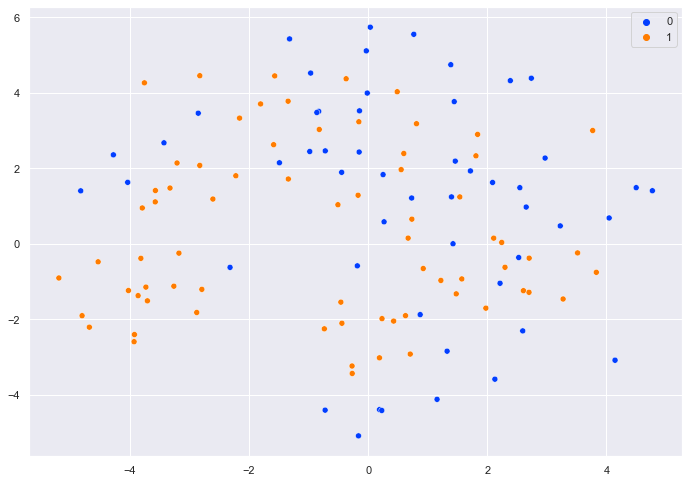

In [74]:
tsne = TSNE(n_components=2,perplexity=40, random_state  = 0)
ts = tsne.fit_transform(img_1D_vector)
sns.scatterplot(ts[:,0], ts[:,1], hue=y1, legend='full', palette=palette)

In [78]:
cmap = plt.get_cmap('nipy_spectral')


plt.scatter(ts[:, 0],ts[:, 1], c=cmap('y1'))
title('TSNE')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''